In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt


def plot_cont_vars(dataframe):

    plt.figure(figsize=(20,40))


    for i in range(len(floats_list)):
        #print (floats_list[i])
        var = str(floats_list[i])
        std_text = std[var].values
        kur_text = kur[var].values
        skew_text = skew[var].values
        #print(std_text)
        plt.subplot(10,2,i+1)
        bp = sns.distplot(dataframe[var], bins=10)
        bp.set_title('Std:{}, Kur:{}, Skew{}'.format(std_text, kur_text, skew_text))

In [5]:
complaints_df = pd.read_csv("C:\\Hackathon_Data\\Complaints data.csv",encoding = "ISO-8859-1")
len(complaints_df.index)

42496

In [6]:
claims_df = pd.read_csv("C:\\Hackathon_Data\\R_CLAIM_EXPORT.txt", encoding = "ISO-8859-1", error_bad_lines=False )
policy_with_claim = claims_df['policy_bk']
policy_with_claim = list(policy_with_claim.values)

b'Skipping line 4023: expected 83 fields, saw 91\nSkipping line 4145: expected 83 fields, saw 85\nSkipping line 4447: expected 83 fields, saw 85\n'


In [7]:
complaints_df.columns

Index(['CAS', 'Goods', 'Nature of Complaint', 'Product', 'Practice',
       'Registered Date', 'Customer Suburb', 'Customer State', 'Customer PC',
       'Cause', 'Defect', 'Industry', 'Trader', 'Licence', 'Trader Suburb'],
      dtype='object')

In [8]:
complaints_df.head()

,CAS,Goods,Nature of Complaint,Product,Practice,Registered Date,Customer Suburb,Customer State,Customer PC,Cause,Defect,Industry,Trader,Licence,Trader Suburb
0,c65de2ad4659cae7cf82342d9f76847a041c84543dcab9...,Installation and supply air conditioner,Noises from air conditioner during warm up and...,Air Conditioning and Heating,Unsatisfactory\Non Performance of Service,29/8/18 00:00,WESTLEIGH,NSW,2120,NaN,NaN,NaN,NaN,NaN,SEVEN HILLS
1,025bcfe192eefb1510532b98f6d976779af4cf1f7f0896...,Inverters,Purchased a solar system in July 2010. On 8 A...,Solar PV Panels,Defective Goods,22/9/15 00:00,WESTLEIGH,NSW,2120,NaN,NaN,NaN,NaN,a85445fde902b3b2f122b6bff807989dbc985e82a7a47...,SYDNEY
2,cdd19e9e674a58e99cb73df3692b7f685502d3a42bc321...,Painting,Payment dispute for pricing only. No defective...,Painting and Decorating,Pricing\Charges\Rent\Fees Not Listed,2/4/12 12:43,NEWPORT,NSW,2106,NaN,NaN,NaN,NaN,491a6c883d3d13b6ef7de6bca9c05933b7f8efa58c90d...,AVALON BEACH
3,9b4825fad3e2847b910448a6ffbfad8770e0a7dc1f5105...,NaN,Railing on main balcony faded.\r\nSalt encrsut...,House Construction,Unsatisfactory\Non Performance of Service,31/1/11 15:18,FORSTER,NSW,2428,NaN,NaN,NaN,NaN,1841cea175e9f172a9a2973812f695e8be05e1382c754...,ENFIELD
4,b0cfdb31a5afcb00ec8b92719d2eedae69650a243494f4...,Tranformer solar,Customer awaiting supply of inverters/transfor...,Solar PV Panels,Non\Partial Supply,22/6/10 13:43,BOAMBEE,NSW,2450,NaN,NaN,NaN,NaN,NaN,ROSEBERY


In [9]:
 pd.to_datetime(complaints_df["Registered Date"]).max()

Timestamp('2018-12-10 00:00:00')

In [10]:
 pd.to_datetime(complaints_df["Registered Date"]).min()

Timestamp('2010-01-01 22:31:00')

In [11]:
policy_df = pd.read_csv("C:\\Hackathon_Data\\R_POLICY_EXPORT.csv",encoding = "ISO-8859-1", error_bad_lines=False )
len(policy_df.index)

b'Skipping line 197673: expected 109 fields, saw 112\n'
b'Skipping line 365536: expected 109 fields, saw 110\n'
b'Skipping line 414650: expected 109 fields, saw 111\n'
b'Skipping line 424887: expected 109 fields, saw 111\nSkipping line 424888: expected 109 fields, saw 111\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,2,3,4,5,6,9,10,11,13,17,39,45,48,49,67,68,73,74,76,77,82,86,87,89,90,91,92,93,94,95,96,98,100,101,102,103,104,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


479988

In [12]:
policy_df.columns

Index(['policy_sk', 'policy_bk', 'insurance_agent', 'issue_date',
       'job_plan_type', 'job_plan_number', 'job_section_number',
       'job_lot_number', 'job_house_number', 'job_house_number_suffix',
       ...
       'job_description', 'transaction_effective_date', 'existing_hbcf_claim',
       'existing_hbcf_claim_no', 'builder_license_covers_all_wrk',
       'transaction_create_date', 'limit_of_insurance',
       'project_completion_exception', 'reinstatement_reason',
       'is_separate_pricing_req_duplex'],
      dtype='object', length=109)

In [13]:
policy_df["Has_Claim"] = policy_df["policy_bk"].isin(policy_with_claim).astype(int)

In [14]:
target_variable = "Has_Claim"

In [15]:
policy_df["Has_Claim"].nunique()

2

In [16]:
policy_df.groupby(by=["Has_Claim"])["policy_bk"].nunique()

Has_Claim
0    475920
1      4063
Name: policy_bk, dtype: int64

In [17]:
policy_number_of_rows = len(policy_df.index)
policy_number_of_rows

479988

In [18]:
policy_df_first_clean = policy_df.copy()

In [19]:
policy_df_first_clean = policy_df_first_clean.dropna(subset=['policy_bk','issue_date','job_postcode','cover_type',
                                                             'architect_name',
                                                            'current_ind',
                                                            'certificate_status_cd',
                                                            'limit_of_insurance',
                                                            'existing_hbcf_claim'])

In [20]:
policy_df_first_clean = policy_df_first_clean.set_index('policy_bk')

In [21]:
for col in policy_df_first_clean.columns:
    na_count = policy_df_first_clean[col].isna().sum()
    if na_count > 0:
        print(col, na_count, " so will be deleted")
        policy_df_first_clean.drop([col], axis=1, inplace=True)
    else:
        print(col, na_count, "so will be kept")
        
    #claims_df.isna().sum()

policy_sk 0 so will be kept
insurance_agent 0 so will be kept
issue_date 0 so will be kept
job_plan_type 447592  so will be deleted
job_plan_number 455137  so will be deleted
job_section_number 479466  so will be deleted
job_lot_number 377939  so will be deleted
job_house_number 68572  so will be deleted
job_house_number_suffix 464793  so will be deleted
job_level_type 479623  so will be deleted
job_level_number 479580  so will be deleted
job_address_site_name 464891  so will be deleted
job_building_name 478866  so will be deleted
job_street_name 3  so will be deleted
job_street_type 1425  so will be deleted
job_suburb 0 so will be kept
job_postcode 0 so will be kept
job_state_cd 0 so will be kept
owner_name 0 so will be kept
owner_street_address 0 so will be kept
owner_suburb 1  so will be deleted
owner_postcode 0 so will be kept
owner_state_cd 0 so will be kept
owner_phone 0 so will be kept
owner_mobile_ph 0 so will be kept
est_start_date 1583  so will be deleted
est_completion_date 

In [22]:
policy_date_fields = list(policy_df_first_clean.filter(regex=(".*date.*")).columns)

In [23]:
for col in policy_date_fields:
    policy_df_first_clean[col] = pd.to_datetime(policy_df_first_clean[col])
    

In [48]:
policy_data_types = pd.DataFrame(policy_df_first_clean.dtypes, columns=['data_type'])
data_unique_values = pd.DataFrame(policy_df_first_clean.nunique() , columns=['unique_values'])
data_description = pd.concat([data_unique_values, policy_data_types], axis=1)
data_description

In [29]:
policy_df_first_clean["job_postcode"] =  policy_df_first_clean["job_postcode"].astype(str)
policy_df_first_clean["certificate_status_cd"] =  policy_df_first_clean["certificate_status_cd"].astype(str)
policy_df_first_clean["insurance_agent"] =  policy_df_first_clean["insurance_agent"].astype(str)
policy_df_first_clean["owner_postcode"] =  policy_df_first_clean["owner_postcode"].astype(str)
policy_df_first_clean["Has_Claim"] =  policy_df_first_clean["Has_Claim"].astype(str)

In [30]:
policy_df_first_clean.drop(["policy_sk"], axis=1, inplace=True)

In [31]:
policy_df_first_clean.drop(["job_number"], axis=1, inplace=True)

In [32]:
policy_df_first_clean.drop(["architect_phonenum"], axis=1, inplace=True)

In [33]:
policy_df_first_clean.drop(["owner_name"], axis=1, inplace=True)

In [34]:
policy_df_first_clean.drop(["owner_street_address"], axis=1, inplace=True)

In [35]:
policy_df_first_clean.drop(["owner_state_cd"], axis=1, inplace=True)

In [36]:
policy_df_first_clean.drop(["owner_phone"], axis=1, inplace=True)

In [37]:
policy_df_first_clean.drop(["owner_mobile_ph"], axis=1, inplace=True)

In [38]:
policy_df_first_clean.drop(["owner_abn"], axis=1, inplace=True)

In [39]:
policy_df_first_clean.drop(["owner_email"], axis=1, inplace=True)

In [40]:
policy_df_first_clean.drop(["details_of_related_party"], axis=1, inplace=True)

In [41]:
policy_df_first_clean.drop(["architect_name"], axis=1, inplace=True)

In [42]:
policy_df_first_clean.drop(["job_state_cd"], axis=1, inplace=True)

In [43]:
#policy_df_first_clean.drop(["owner_email"], axis=1, inplace=True)

In [44]:
policy_df_first_clean.describe(include = 'all')

,insurance_agent,issue_date,job_suburb,job_postcode,owner_postcode,contract_amount,premium_amount,stamp_duty_amt,broker_commision,premium_gst,...,create_date,last_update_date,current_ind,broker_abn_record,job_type,transaction_effective_date,existing_hbcf_claim,builder_license_covers_all_wrk,limit_of_insurance,Has_Claim
count,479662,479662,479662,479662,479662,4.796620e+05,479662.000000,479662.000000,479662.000000,479662.000000,...,479662,479662,479662,479662,479662,479662,479662.0,479662.0,4.796620e+05,479662
unique,6,4512,9284,1196,2093,NaN,NaN,NaN,NaN,NaN,...,753,751,1,1,4,98528,6.0,5.0,NaN,2
top,106,1970-01-01 00:00:00.020180927,KELLYVILLE,2570,2153.0,NaN,NaN,NaN,NaN,NaN,...,2016-03-29 15:25:44,2016-03-29 15:25:44,Y,\N,Policy Change,1970-01-01 00:00:00.020180604,0.0,1.0,NaN,0
freq,249642,743,3421,9970,6847,NaN,NaN,NaN,NaN,NaN,...,166381,166381,479662,479662,250273,8265,471564.0,463558.0,NaN,475599
first,NaN,1970-01-01 00:00:00.020100701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2016-03-29 15:25:44,2016-03-29 15:25:44,NaN,NaN,NaN,1970-01-01 00:00:00.020101006,NaN,NaN,NaN,NaN
last,NaN,2018-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-11-01 06:12:23,2018-11-01 06:12:23,NaN,NaN,NaN,2018-10-31 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.226881e+05,1360.917671,134.729612,140.617971,136.091630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.502165e+06,NaN
std,NaN,NaN,NaN,NaN,NaN,3.890025e+05,3481.825115,344.699602,360.183921,348.182645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.693069e+06,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+05,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.000000e+04,211.680000,20.950000,21.360000,21.170000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.400000e+05,NaN


In [67]:
policy_df_second_clean = policy_df_first_clean.copy()
policy_data_types_2 = pd.DataFrame(policy_df_second_clean.dtypes, columns=['data_type'])
data_unique_values_2 = pd.DataFrame(policy_df_second_clean.nunique() , columns=['unique_values'])
data_description_2 = pd.concat([data_unique_values_2, policy_data_types_2], axis=1)
data_description_2 = data_description_2[data_description_2['data_type']=="object"]

In [68]:
data_description_2 = data_description_2[data_description_2['unique_values'] > 1]

In [70]:
cat_vars_to_plot = list(data_description_2[data_description_2['unique_values'] < 100]['unique_values'].index)
cat_vars_to_plot

['insurance_agent',
 'cover_type',
 'certificate_status_cd',
 'adt_jobstream_name',
 'job_type',
 'existing_hbcf_claim',
 'builder_license_covers_all_wrk',
 'Has_Claim']

In [58]:
data_types = pd.DataFrame(policy_df_first_clean.dtypes, columns=['data_type'])
#print(data_types)
floats = data_types[(data_types['data_type']=='float64')]
floats_list = list(floats.index)
print(floats_list)

ints = data_types[(data_types['data_type']=='int64')]
ints_list = list(ints.index)
print(ints_list)

floats_list = ints_list + floats_list 

categoricals = data_types[data_types['data_type']=='object']
categoricals_list = list(categoricals.index)
print(categoricals_list)

['contract_amount', 'premium_amount', 'stamp_duty_amt', 'broker_commision', 'premium_gst', 'broker_commission_gst', 'adt_batch_id', 'limit_of_insurance']
[]
['insurance_agent', 'job_suburb', 'job_postcode', 'owner_postcode', 'broker_bk', 'builder_bk', 'builder_abn_bk', 'cover_type', 'certificate_status_cd', 'previous_certificate_bk', 'adt_jobstream_name', 'adt_timestamp', 'current_ind', 'broker_abn_record', 'job_type', 'existing_hbcf_claim', 'builder_license_covers_all_wrk', 'Has_Claim']


In [59]:

floats_list.remove('adt_batch_id')

In [60]:
kur = pd.DataFrame(policy_df_first_clean[floats_list].kurtosis(axis=0), columns=['Kurtosis'])
kur = kur.T
kur

skew = pd.DataFrame(policy_df_first_clean[floats_list].skew(axis=0), columns=['Skew'])
skew = skew.T
skew

std = pd.DataFrame(policy_df_first_clean[floats_list].std(axis=0), columns=['Std'])
std = std.T
std

frames = [std,skew,kur]

all_stats = pd.concat(frames)
all_stats

,contract_amount,premium_amount,stamp_duty_amt,broker_commision,premium_gst,broker_commission_gst,limit_of_insurance
Std,389002.523220,3481.825115,344.699602,360.183921,348.182645,36.018449,8.693069e+06
Skew,20.761197,35.707744,35.707861,32.464142,35.707718,32.463048,1.096863e+00
Kurtosis,971.015597,2568.286878,2568.304268,2344.988230,2568.284479,2344.778381,-7.833258e-01


In [61]:
def log_transform(dataframe): 
    dataframe_transform = dataframe.copy()

    for i in range(len(floats_list)):
        var = str(floats_list[i])
        std_text = std[var].values
        kur_text = kur[var].values
        skew_text = skew[var].values
        skew_true = skew_text > 2 or skew_text < -2
        kur_true = kur_text > 2 or kur_text < -2

        if kur_true == True or skew_true == True:
            transform = True
        else:
            transform = False

        print(var,'is', transform,'and has kur:',kur_text,'and skew:',skew_text)



        if transform == True:    
            dataframe_transform[var] = (dataframe_transform[var]+1).apply(np.log)
        else:
            dataframe_transform[var] = dataframe_transform[var]
            
    return dataframe_transform

In [62]:
policy_df_transform = log_transform(policy_df_first_clean)


contract_amount is True and has kur: [971.01559721] and skew: [20.76119679]
premium_amount is True and has kur: [2568.28687836] and skew: [35.70774418]
stamp_duty_amt is True and has kur: [2568.3042683] and skew: [35.70786148]
broker_commision is True and has kur: [2344.9882305] and skew: [32.46414215]
premium_gst is True and has kur: [2568.2844791] and skew: [35.70771792]
broker_commission_gst is True and has kur: [2344.77838111] and skew: [32.46304837]
limit_of_insurance is False and has kur: [-0.78332577] and skew: [1.0968633]


In [ ]:
plot_cont_vars(policy_df_transform)

In [ ]:
g = sns.PairGrid(policy_df_transform, vars=floats_list,
                 hue='Has_Claim', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [72]:
def plot_cont_kdes(data_frame,target_list,floats_list,target_var_name):    
    target = target_list
    plt.figure(figsize=(20,40))
    fig_no = 1

    for col in floats_list:
        df = data_frame[[target_var_name,col]]
        #print(df.head())
        plt.subplot(8,2,fig_no)   
        for cols in target:
            #print(target_var_name == cols)
            #print(cols)
            df_sub = df[df[target_var_name] == cols]
            #print(df_sub.head())
            df_sub = df_sub[col]
            df_sub = df_sub.rename(cols)
            #print(df_sub.head())
            sns.kdeplot(df_sub, shade=True, legend=True)
            plt.title(col)

        fig_no = fig_no+1

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


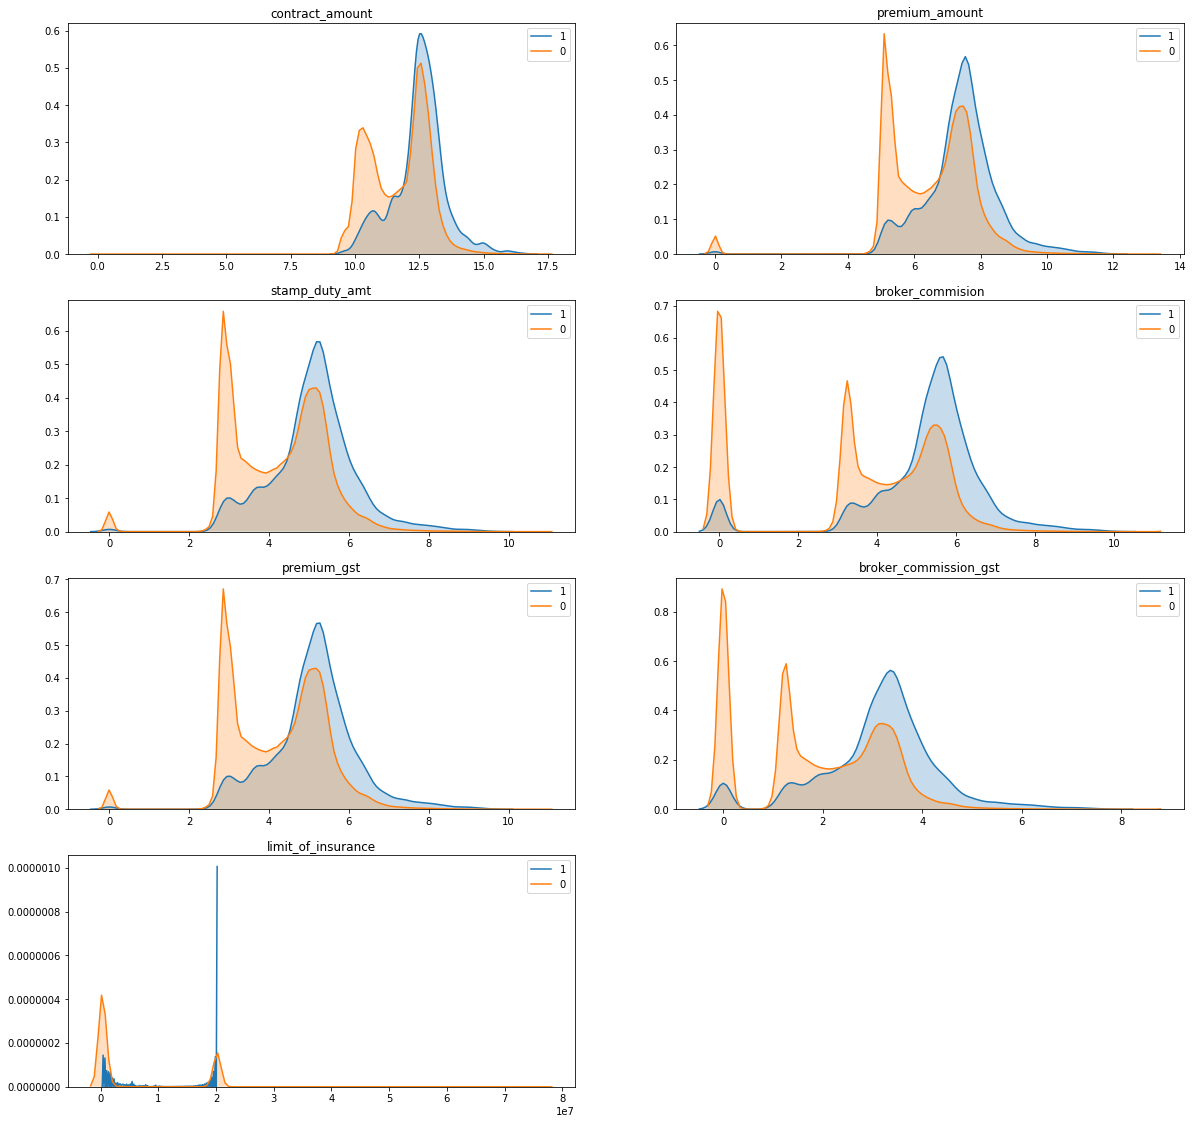

In [73]:
plot_cont_kdes(policy_df_transform,['1','0'],floats_list,'Has_Claim')

In [ ]:
categoricals_list.remove("broker_bk")

In [74]:
def cat_plots(dataframe, target_var, categoricals_list, target_var_list):    
    dataframe_final = dataframe[categoricals_list]

    for cat in categoricals_list:    
        df = dataframe_final.groupby([target_var, cat])[cat].count()
       
        df_pivot = df.unstack(level=0)
        df_pivot[target_var_list[0]] = df_pivot[target_var_list[0]]/df_pivot[target_var_list[0]].sum()
        df_pivot[target_var_list[1]] = df_pivot[target_var_list[1]]/df_pivot[target_var_list[1]].sum()
        

        pos = list(range(len(df_pivot.index)))
        #print(pos)

        width = 0.4
        
        print(df_pivot.index)

        # Plotting the bars
        fig, ax = plt.subplots(figsize=(20,10))

        # Create a bar with pre_score data,
        # in position pos,
        plt.bar(pos, 
                #using df['pre_score'] data,
                df_pivot[target_var_list[0]], 
                # of width
                width, 
                # with alpha 0.5
                alpha=0.5, 
                # with color
                color='#EE3224', 
                # with label the first value in first_name
                label=df_pivot.index[0]) 

        # Create a bar with mid_score data,
        # in position pos + some width buffer,
        plt.bar([p + width for p in pos], 
                #using df['mid_score'] data,
                df_pivot[target_var_list[1]],
                # of width
                width, 
                # with alpha 0.5
                alpha=0.5, 
                # with color
                color='#F78F1E', 
                # with label the second value in first_name
                label=df_pivot.index[1]) 


        # Set the y axis label
        ax.set_ylabel('pct')

        # Set the chart's title
        ax.set_title(cat)

        # Set the position of the x ticks
        ax.set_xticks([p + (0.5*width) for p in pos])

        # Set the labels for the x ticks
        ax.set_xticklabels(df_pivot.index.values , rotation=45)

        # Setting the x-axis and y-axis limits
        #plt.xlim(min(pos)-width, max(pos)+width*4)
        #plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

        # Adding the legend and showing the plot
        plt.legend(target_var_list, loc='upper left')
        plt.savefig("cat_"+cat+".png")
        plt.grid()
        plt.show()
        plt.clf()

Index(['101', '106', '106.0', '107', '107.0', '115'], dtype='object', name='insurance_agent')


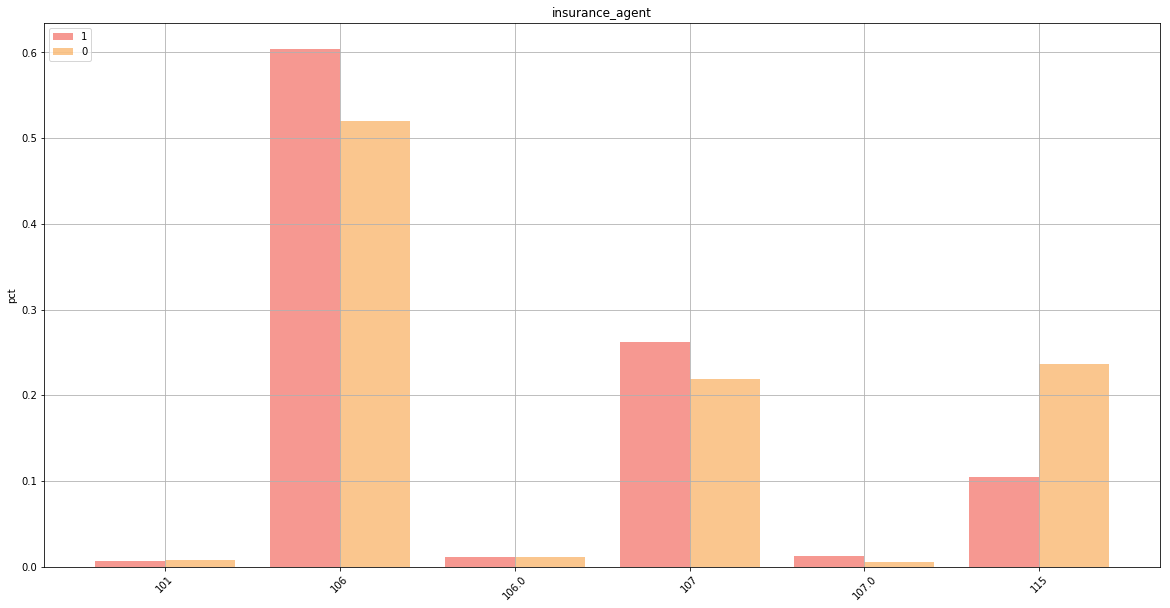

Index(['C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09'], dtype='object', name='cover_type')


<Figure size 432x288 with 0 Axes>

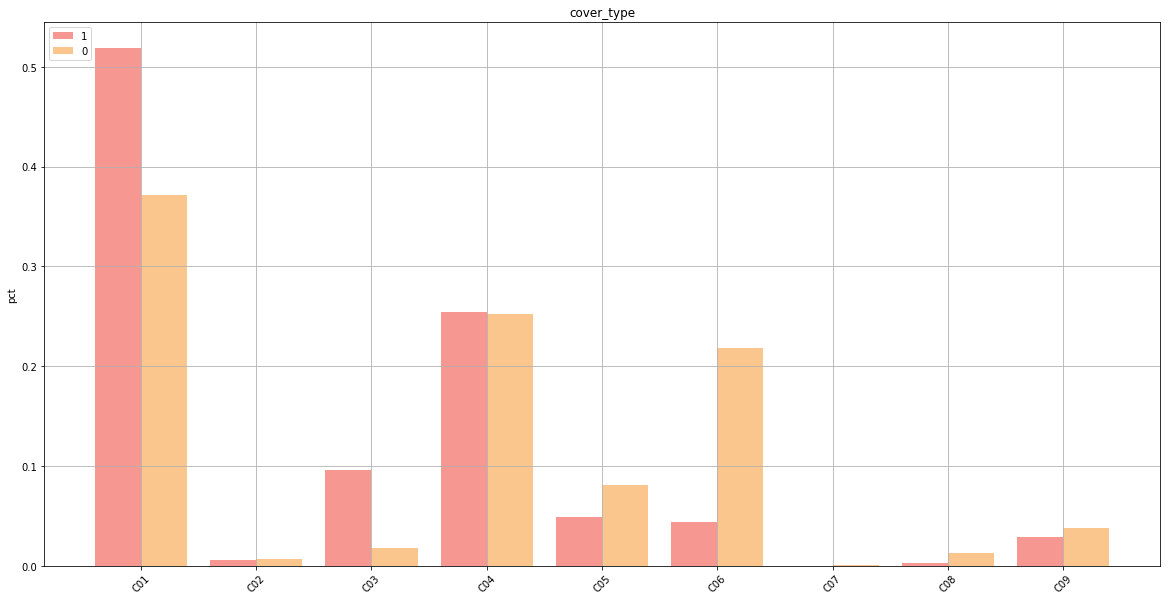

Index(['0.0', '4.0'], dtype='object', name='certificate_status_cd')


<Figure size 432x288 with 0 Axes>

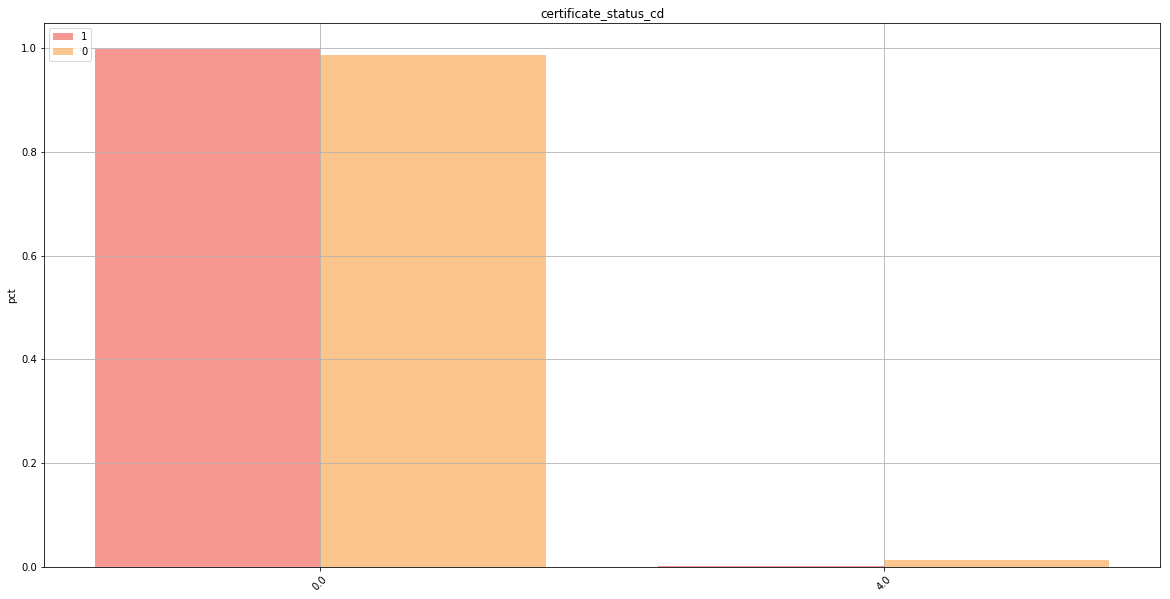

Index(['HBCF_CLN', 'HWI_STG_CIMS'], dtype='object', name='adt_jobstream_name')


<Figure size 432x288 with 0 Axes>

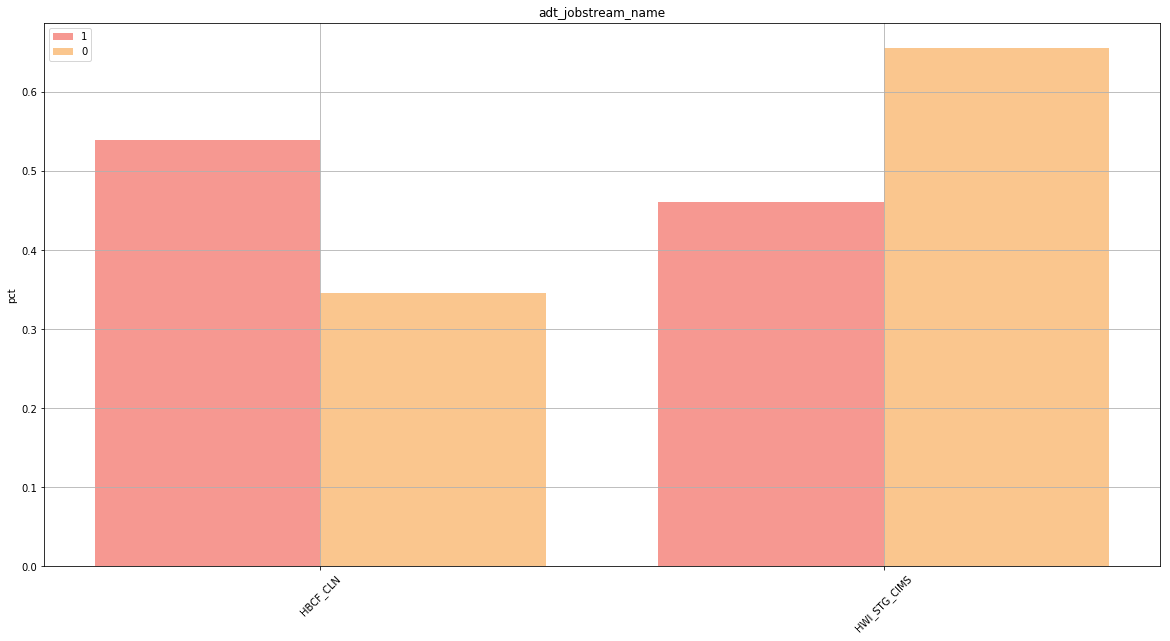

Index(['Cancellation', 'Policy Change', 'Reinstatement', 'Submission'], dtype='object', name='job_type')


<Figure size 432x288 with 0 Axes>

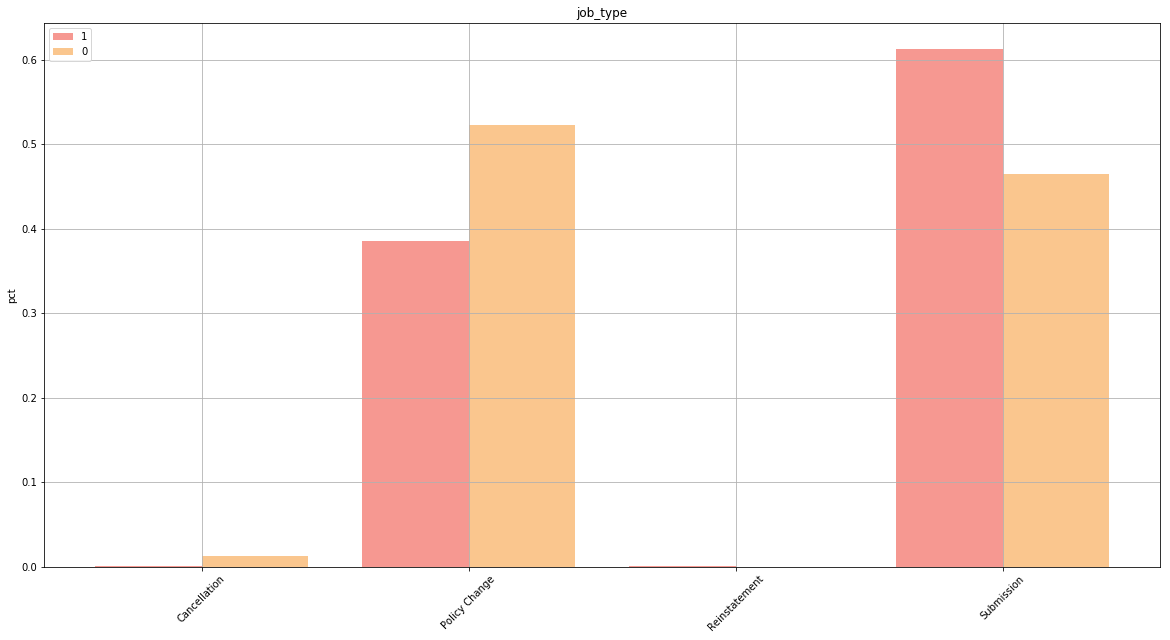

Index([0, 1, '0', '1', 'false', 'true'], dtype='object', name='existing_hbcf_claim')


<Figure size 432x288 with 0 Axes>

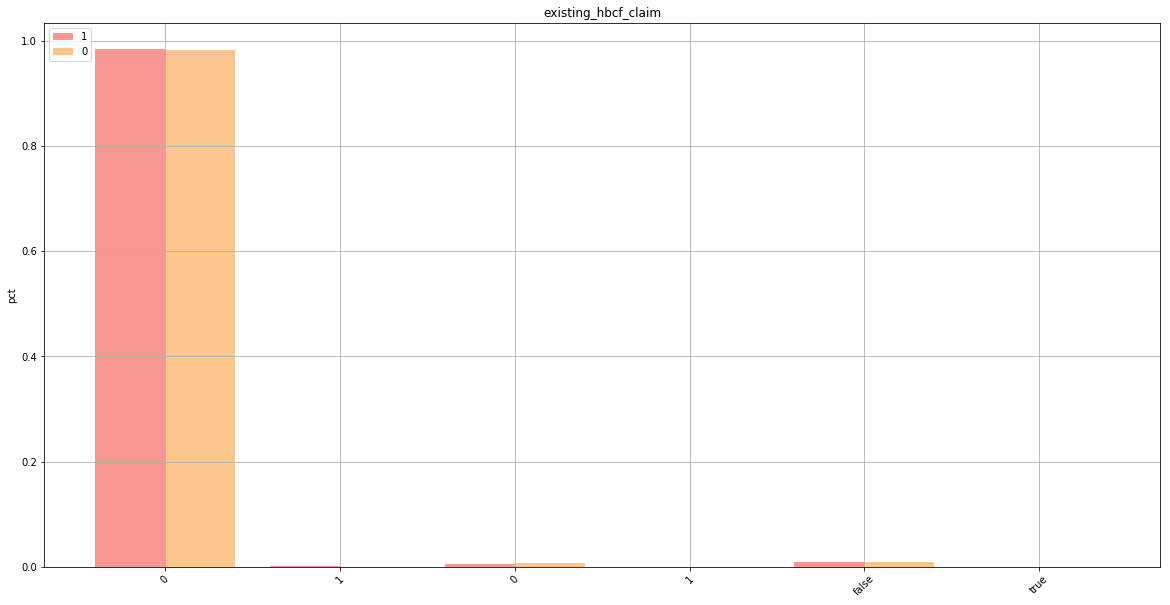

Index([0, 1, '0', '1', 'true'], dtype='object', name='builder_license_covers_all_wrk')


<Figure size 432x288 with 0 Axes>

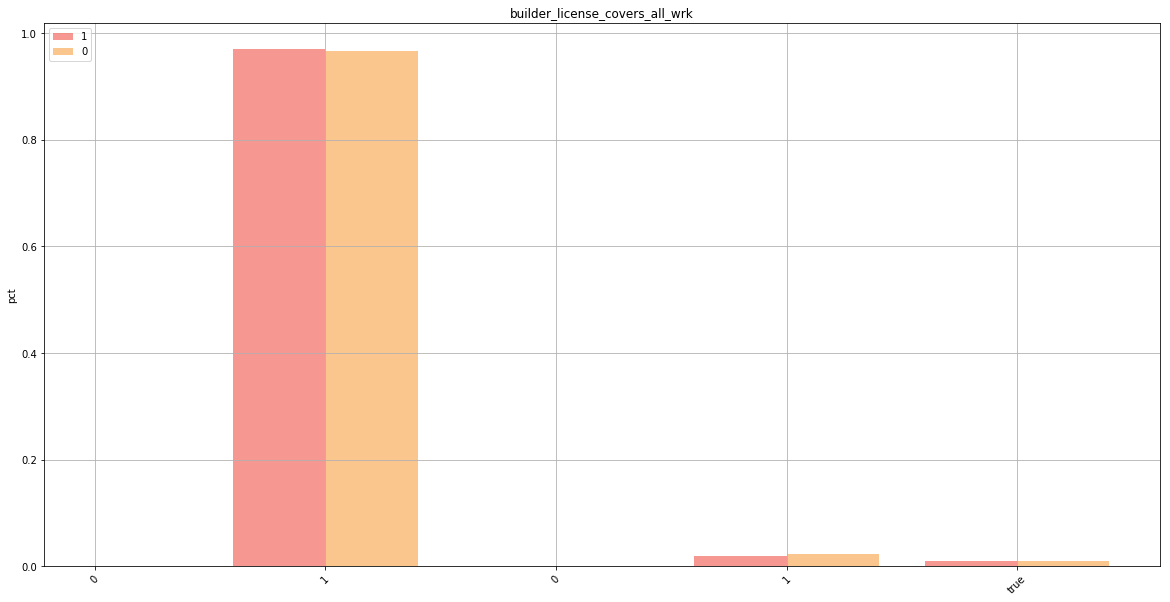

Index(['0', '1'], dtype='object', name='Has_Claim')


<Figure size 432x288 with 0 Axes>

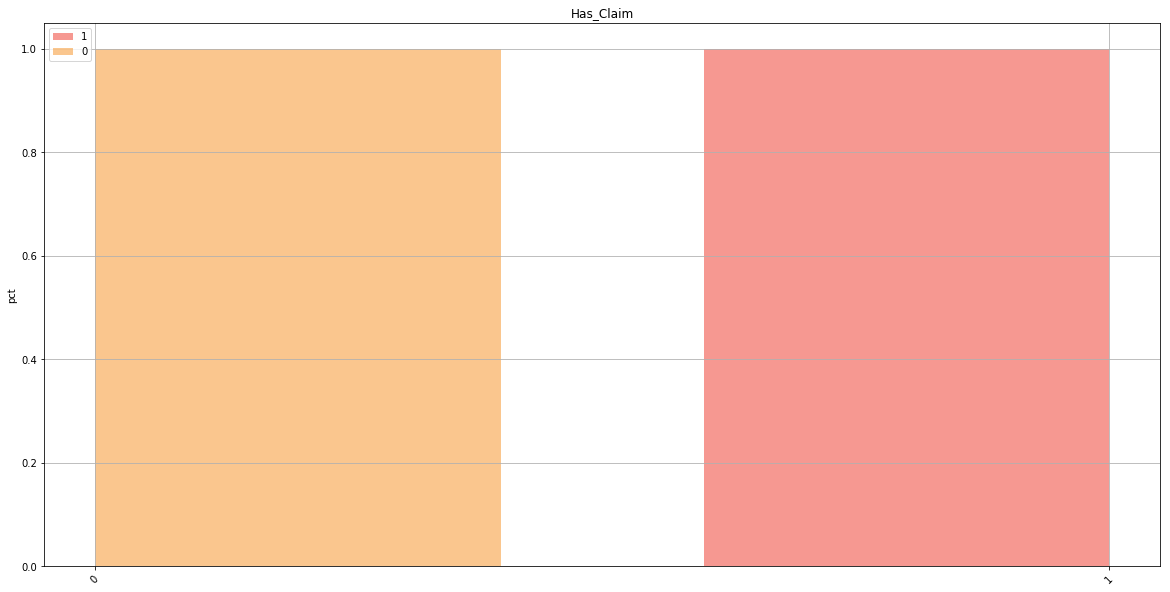

<Figure size 432x288 with 0 Axes>

In [75]:
cat_plots(policy_df_transform, 'Has_Claim', cat_vars_to_plot, ['1','0'])

In [ ]:
categoricals_list

In [ ]:
policy_df_transform[categoricals_list]

In [ ]:
claims_df = pd.read_csv("C:\\Hackathon_Data\\R_CLAIM_EXPORT.txt", encoding = "ISO-8859-1", error_bad_lines=False )
policy_with_claim = claims_df['policy_bk']
policy_with_claim = list(policy_with_claim.values)

In [ ]:
claims_df["date_originally_created"] = pd.to_datetime(claims_df["date_originally_created"])

In [ ]:
claims_df.tail()

In [ ]:
claims_df['certificate_bk'].nunique()

In [ ]:
claim_builders = claims_df.groupby(by=["certificate_bk"])["cims_claim_number_sk"].nunique()
claim_builders

In [ ]:
number_of_rows = len(claims_df.index)
number_of_rows

In [ ]:
claims_df_first_clean = claims_df.copy()

In [ ]:
for col in claims_df_first_clean.columns:
    na_count = claims_df_first_clean[col].isna().sum()
    if na_count > 0:
        print(col, na_count, " so will be deleted")
        claims_df_first_clean.drop([col], axis=1, inplace=True)
    else:
        print(col, na_count, "so will be kept")
        
    #claims_df.isna().sum()

In [ ]:
claims_df_first_clean.columns

In [ ]:
claim_unique_vals = claims_df_first_clean.nunique().sort_values(axis=0, ascending=False)
claim_unique_vals[claim_unique_vals < 10]
final_cat_list = claim_unique_vals.index
final_cat_list

In [ ]:
for col in claims_df_first_clean:
    if claim_unique_vals[col] < 10:
        grouped = claims_df_first_clean.groupby(by=[col])["cims_claim_number_sk"].count()
        print(grouped)
    else:
        pass

In [ ]:
grouped = claims_df.groupby(by=["claim_status_code"])["cims_claim_number_sk"].count()
grouped

In [ ]:
claims_df_second_clean = claims_df_first_clean.copy()
len(claims_df_second_clean)

In [ ]:
claims_df_a = claims_df_second_clean[claims_df_second_clean['claim_status_code'] == 'A']
claims_df_f = claims_df_second_clean[claims_df_second_clean['claim_status_code'] == 'F']
a_and_f = [claims_df_a, claims_df_f]
claims_df_second_clean = pd.concat(a_and_f)

In [ ]:
len(claims_df_second_clean.index)

In [ ]:
data_types = pd.DataFrame(claims_df_second_clean.dtypes, columns=['data_type'])
print(data_types)
floats = data_types[(data_types['data_type']=='float64')]
floats_list = list(floats.index)
print(floats_list)

ints = data_types[(data_types['data_type']=='int64')]
ints_list = list(ints.index)
print(ints_list)

floats_list = ints_list + floats_list 

categoricals = data_types[data_types['data_type']=='object']
categoricals_list = list(categoricals.index)
print(categoricals_list)

In [ ]:
kur = pd.DataFrame(claims_df_second_clean[floats_list].kurtosis(axis=0), columns=['Kurtosis'])
kur = kur.T
kur

skew = pd.DataFrame(claims_df_second_clean[floats_list].skew(axis=0), columns=['Skew'])
skew = skew.T
skew

std = pd.DataFrame(claims_df_second_clean[floats_list].std(axis=0), columns=['Std'])
std = std.T
std

frames = [std,skew,kur]

all_stats = pd.concat(frames)
all_stats

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,40))


for i in range(len(floats_list)):
    #print (floats_list[i])
    var = str(floats_list[i])
    std_text = std[var].values
    kur_text = kur[var].values
    skew_text = skew[var].values
    #print(std_text)
    plt.subplot(10,2,i+1)
    bp = sns.distplot(claims_df_second_clean[var], bins=10)
    bp.set_title('Std:{}, Kur:{}, Skew{}'.format(std_text, kur_text, skew_text))
    


In [ ]:
claims_df_transform = claims_df_second_clean.copy()

for i in range(len(floats_list)):
    var = str(floats_list[i])
    std_text = std[var].values
    kur_text = kur[var].values
    skew_text = skew[var].values
    skew_true = skew_text > 2 or skew_text < -2
    kur_true = kur_text > 2 or kur_text < -2
    
    if kur_true == True or skew_true == True:
        transform = True
    else:
        transform = False
    
    print(var,'is', transform,'and has kur:',kur_text,'and skew:',skew_text)
        
            
        
    if transform == True:    
        claims_df_transform[var] = (claims_df_transform[var]+1).apply(np.log)
    else:
        claims_df_transform[var] = claims_df_transform[var]
    

In [ ]:
kur_trans = pd.DataFrame(claims_df_transform[floats_list].kurtosis(axis=0), columns=['Kurtosis'])
kur_trans = kur_trans.T
skew_trans = pd.DataFrame(claims_df_transform[floats_list].skew(axis=0), columns=['Skew'])
skew_trans = skew_trans.T
std_trans = pd.DataFrame(claims_df_transform[floats_list].std(axis=0), columns=['Std'])
std_trans = std_trans.T
std_trans

In [ ]:
plt.figure(figsize=(20,40))

from math import sqrt

for i in range(len(floats_list)):
    #print (floats_list[i])
    var = str(floats_list[i])
    std_text = std_trans[var].values
    kur_text = kur_trans[var].values
    skew_text = skew_trans[var].values
    #print(std_text)
    plt.subplot(10,2,i+1)
    
    nbins = int(round(sqrt(claims_df_transform[var].max())+10,0))
    #print (nbins)
    
    bp = sns.distplot(claims_df_transform[var], bins=nbins)
    bp.set_title('{} -- Std:{}, Kur:{}, Skew{}'.format(var, std_text, kur_text, skew_text))

In [ ]:
target = ['F','A']
plt.figure(figsize=(20,40))
fig_no = 1

for col in floats_list:
    df = claims_df_transform[['claim_status_code',col]]
    plt.subplot(8,2,fig_no)   
    for cols in target:
        #print(cols)
        df_sub = df[df['claim_status_code'] == cols]
        #print(df_sub.head())
        df_sub = df_sub[col]
        df_sub = df_sub.rename(cols)
        #print(df_sub.head())
        sns.kdeplot(df_sub, shade=True, legend=True)
        plt.title(col)
        
    fig_no = fig_no+1

In [ ]:
g = sns.PairGrid(claims_df_transform, vars=floats_list,
                 hue='claim_status_code', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [ ]:
categoricals_list_for_plots = categoricals_list.copy()

categoricals_list_for_plots.remove('claim_status_code')

categoricals_list_for_plots

In [ ]:
df = claims_df_transform.groupby(['claim_status_code','claim_number'])['claim_number'].count()

print(df.index, type(df))

In [ ]:
claims_df_final = claims_df_second_clean[final_cat_list]

for cat in final_cat_list:    
    df = claims_df_final.groupby(['claim_status_code', cat])[cat].count()
    df_pivot = df.unstack(level=0)
    df_pivot['F'] = df_pivot['F']/df_pivot['F'].sum()
    df_pivot['A'] = df_pivot['A']/df_pivot['A'].sum()
    print (df_pivot)
    
    pos = list(range(len(df_pivot.index)))
    #print(pos)

    width = 0.4

    # Plotting the bars
    fig, ax = plt.subplots(figsize=(20,10))

    # Create a bar with pre_score data,
    # in position pos,
    '''plt.bar(pos, 
            #using df['pre_score'] data,
            df_pivot['F'], 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#EE3224', 
            # with label the first value in first_name
            label=df_pivot.index[0]) 

    # Create a bar with mid_score data,
    # in position pos + some width buffer,
    plt.bar([p + width for p in pos], 
            #using df['mid_score'] data,
            df_pivot['A'],
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#F78F1E', 
            # with label the second value in first_name
            label=df_pivot.index[1]) 


    # Set the y axis label
    ax.set_ylabel('pct')

    # Set the chart's title
    ax.set_title(cat)

    # Set the position of the x ticks
    ax.set_xticks([p + (0.5*width) for p in pos])

    # Set the labels for the x ticks
    ax.set_xticklabels(df_pivot.index.values , rotation=45)

    # Setting the x-axis and y-axis limits
    #plt.xlim(min(pos)-width, max(pos)+width*4)
    #plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

    # Adding the legend and showing the plot
    plt.legend(['F','A'], loc='upper left')
    plt.grid()
    plt.show()
    plt.clf()'''

In [ ]:
pos = list(range(len(df_pivot.index)))
print(pos)

width = 0.4

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df_pivot['Bad'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=df_pivot.index[0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df_pivot['Good'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in first_name
        label=df_pivot.index[1]) 
 

# Set the y axis label
ax.set_ylabel('pct')

# Set the chart's title
ax.set_title('Home Onwnership Split')

# Set the position of the x ticks
ax.set_xticks([p + (0.5*width) for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_pivot.index.values)

# Setting the x-axis and y-axis limits
#plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend(['Bad','Good'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
np.sort(policy_df.columns.values)

In [ ]:
builder_df = pd.read_csv("C:\\Hackathon_Data\\R_BUILDER_EXPORT.txt", encoding = "ISO-8859-1", error_bad_lines=False )

In [ ]:
builder_df